In [1]:
import numpy as np
import dimod
import matplotlib.pyplot as plt
import dwave_networkx as dnx
import networkx as nx
import minorminer
import minorminer.layout as mml
%matplotlib inline
import dwave.inspector
import matplotlib as mpl
import math
from datetime import datetime
from pathlib import Path  
import pandas as pd
import os
import pickle
import random
from scipy.signal import savgol_filter
from scipy import interpolate
import h5py
plt.ioff()

####
#CAREFUL - put these files from kagome_embedding.ipynb in the correct folder
####
#load the graph and the dictionary
final_qubit_dictionary = np.load("../data/dict_qbit_to_lattice_periodic.npy", allow_pickle=True).flat[0]
Kag_graph = pickle.load(open('../data/Kag_graph_periodic.pickle', 'rb'))
unit_cells = np.load("../data/unitcells.npy", allow_pickle=True).flat[0]
unit_cells_down = np.load("../data/unitcells_down.npy", allow_pickle=True).flat[0]

#test that it works
#nx.draw(Kag_graph, final_qubit_dictionary)


# Old function for interpolation scheme

You can play around with that on the raw 2D data

In [2]:
from scipy.interpolate import griddata
nk_init = 19
xlim = np.linspace(-2*np.pi, 2*np.pi, 4*(nk_init - 1) + 1)
ylim = np.linspace(-2*np.pi, 2*np.pi, 4*(nk_init - 1) + 1)
#xlim = np.hstack((np.linspace(-2*np.pi, -0.5, 50), np.linspace(0.5, 2*np.pi, 50)))
#ylim = np.hstack((np.linspace(-2*np.pi, -0.5, 50), np.linspace(0.5, 2*np.pi, 50)))
grid_x, grid_y = np.meshgrid(xlim, ylim, indexing='ij')
total_K = []
for i in range(len(kx_vals)):
        total_K.append([kx_vals[i], ky_vals[i]])
total_K = np.array(total_K)
points = total_K
values = finalSQ_spin
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
#possible methods: nearest, square, cubic


#plt.subplot(221)
#plt.imshow(func(grid_x, grid_y).T, extent=(0, 1, 0, 1), origin='lower')
#plt.plot(points[:, 0], points[:, 1], 'k.', ms=1)   # data
#plt.title('Original')
extent_plot = (-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi)
norm = plt.Normalize(0,np.max(values))

cmap = plt.cm.get_cmap('gist_stern_r')
plt.imshow(grid_z0.T, extent=extent_plot, origin='lower', cmap = cmap, norm = norm)
plt.title('Nearest Interpolation of S(q) for Triangle OP')
plt.colorbar()
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
theta_list = [2*np.pi*i/6 for i in range(7)]
lside = 4*np.pi/3
for j in range(6):
    plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])], [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)

#total_K_again, kx, ky = path_Kagome(11)
#for i in range(20):
#    plt.scatter(*total_K_again[i], color = 'black', s = 5)
plt.gcf().set_size_inches(6, 6)
plt.show()

NameError: name 'kx_vals' is not defined

# Only plotting 

Here we plot the structure factor from the already pre computed values, in the folders.

Note that the folder source and the h/J would need to be changed to your own data

The classical part is already done and does not need to be done again.

## Classical, $\Gamma = 0$



Folder for classical ($\Gamma = 0$)

In [132]:
where_to_save = "../data_prathus_runs/processed_FT/"
mainfolder = list(Path(where_to_save).glob('*'))
some_folders = []
jval = 'J=0.66'
#jval = 'J=1.4'
all_h = []
all_hoverJ = []
for folder in mainfolder:
    split_folder = str(folder).split('_')
    #print(split_folder)
    if split_folder[5] == jval:
        some_folders.append(folder)
        h = split_folder[6].split('h')[1][1:-1]
        all_h.append(h)
        all_hoverJ.append(float(h)/float(jval[2:]))
#    print(str(folder))
#print(mainfolder)
print(some_folders)
print(all_h)
print(all_hoverJ)

index_plot = 5
file_name = where_to_save + "3D_FT_" + jval + "_h=" + all_h[index_plot] + ".hdf5"
data = h5py.File(file_name, 'r')

kx_vals = data['kx']
ky_vals = data['ky']
finalSQ_spin = np.absolute(data['avg_sigmasigma'])

file_name = where_to_save + "line_FT_" + jval + "_h=" + all_h[index_plot] + ".hdf5"
data2 = h5py.File(file_name, 'r')

kx_vals_line = data2['kx']
ky_vals_line = data2['ky']
total_K = []
flat_kx = np.array(kx_vals_line).flatten()
flat_ky = np.array(ky_vals_line).flatten()
for i in range(len(flat_kx)):
        total_K.append([flat_kx[i], flat_ky[i]])
total_K = np.array(total_K)
finalSQ_spin_line = np.absolute(data2['avg_sigmasigma'])

[PosixPath('../data_prathus_runs/processed_FT/line_FT_J=0.66_h=0.0.hdf5'), PosixPath('../data_prathus_runs/processed_FT/line_FT_J=0.66_h=2.7199999999999998.hdf5'), PosixPath('../data_prathus_runs/processed_FT/line_FT_J=0.66_h=0.6399999999999997.hdf5'), PosixPath('../data_prathus_runs/processed_FT/3D_FT_J=0.66_h=0.0.hdf5'), PosixPath('../data_prathus_runs/processed_FT/3D_FT_J=0.66_h=2.7199999999999998.hdf5'), PosixPath('../data_prathus_runs/processed_FT/line_FT_J=0.66_h=1.92.hdf5'), PosixPath('../data_prathus_runs/processed_FT/3D_FT_J=0.66_h=1.2800000000000002.hdf5'), PosixPath('../data_prathus_runs/processed_FT/3D_FT_J=0.66_h=1.92.hdf5'), PosixPath('../data_prathus_runs/processed_FT/3D_FT_J=0.66_h=0.6399999999999997.hdf5'), PosixPath('../data_prathus_runs/processed_FT/line_FT_J=0.66_h=1.2800000000000002.hdf5')]
['0.0', '2.7199999999999998', '0.6399999999999997', '0.0', '2.7199999999999998', '1.92', '1.2800000000000002', '1.92', '0.6399999999999997', '1.2800000000000002']
[0.0, 4.121212

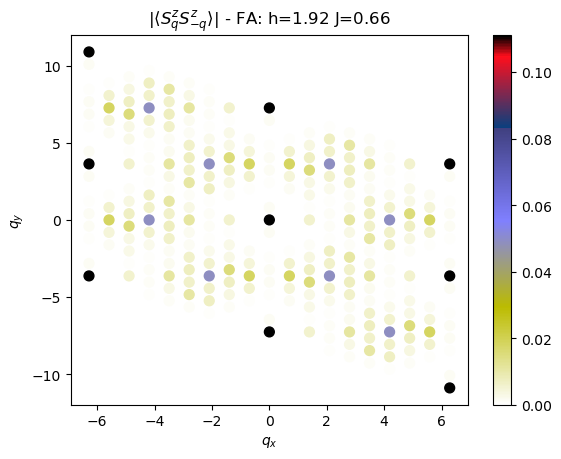

In [133]:
norm = plt.Normalize(0,(1/3)**2)
cmap = plt.cm.get_cmap('gist_stern_r')
#finalSQ_spin = np.absolute(structure_factor)
#finalSQ = final_spin_Q2 - final_spin_Q**2
plt.scatter(kx_vals, ky_vals, s=50, c=finalSQ_spin, cmap=cmap, norm=norm)
plt.colorbar()
theta_list = [2*np.pi*i/6 for i in range(7)]
lside = 4*np.pi/3
#for j in range(6):
#    plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])],
#     [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)
# total_K_again, kx, ky = path_Kagome(6)
# for i in range(len(total_K_again)):
#     plt.scatter(*total_K_again[i], color = 'black', s = 100, alpha = 0.1)
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
plt.title(r'$S(q)$, with 1st Brillouin Zone')
#plt.title("h/J=" + hoverJ_apq[1] + " s=" + str(0.7))
plt.title(r'$|\langle S^z_q S^z_{-q} \rangle |$' + " - FA: h=" + all_h[index_plot] + " " + jval);

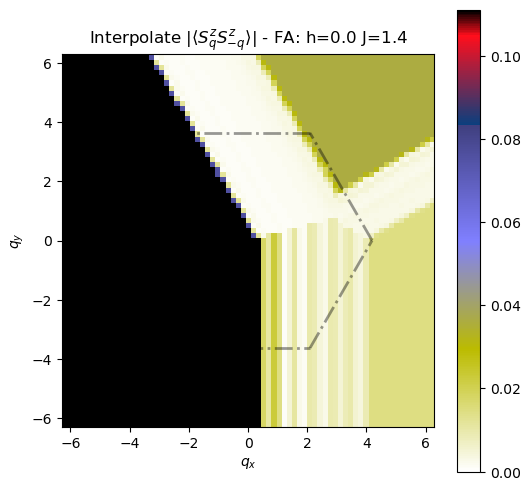

In [77]:
from scipy.interpolate import griddata
nk_init = 19
xlim = np.linspace(-2*np.pi, 2*np.pi, 4*(nk_init - 1) + 1)
ylim = np.linspace(-2*np.pi, 2*np.pi, 4*(nk_init - 1) + 1)
#xlim = np.hstack((np.linspace(-2*np.pi, -0.5, 50), np.linspace(0.5, 2*np.pi, 50)))
#ylim = np.hstack((np.linspace(-2*np.pi, -0.5, 50), np.linspace(0.5, 2*np.pi, 50)))
grid_x, grid_y = np.meshgrid(xlim, ylim, indexing='ij')
total_K = []
flat_kx = np.array(kx_vals).flatten()
flat_ky = np.array(ky_vals).flatten()
for i in range(len(flat_kx)):
        total_K.append([flat_kx[i], flat_ky[i]])
total_K = np.array(total_K)
points = total_K
values = finalSQ_spin
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
#possible methods: nearest, square, cubic


#plt.subplot(221)
#plt.imshow(func(grid_x, grid_y).T, extent=(0, 1, 0, 1), origin='lower')
#plt.plot(points[:, 0], points[:, 1], 'k.', ms=1)   # data
#plt.title('Original')
extent_plot = (-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi)
norm = plt.Normalize(0,(1/3)**2)

cmap = plt.cm.get_cmap('gist_stern_r')
plt.imshow(grid_z0.T, extent=extent_plot, origin='lower', cmap = cmap, norm = norm)
plt.title(r'Interpolate $|\langle S^z_q S^z_{-q} \rangle |$' + " - FA: h=" + all_h[index_plot] + " " + jval);
plt.colorbar()
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
theta_list = [2*np.pi*i/6 for i in range(7)]
lside = 4*np.pi/3
for j in range(6):
    plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])], [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)

#total_K_again, kx, ky = path_Kagome(11)
#for i in range(20):
#    plt.scatter(*total_K_again[i], color = 'black', s = 5)
plt.gcf().set_size_inches(6, 6)
plt.show()

Line plots

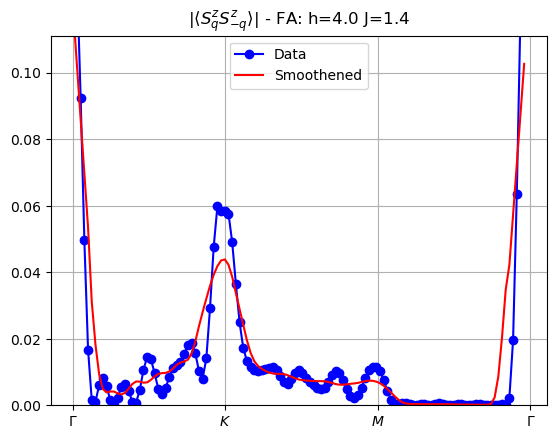

In [78]:
#import Gamma = 0 data
index_plot = 4
#1, 5, 0, 4
file_name = where_to_save + "line_FT_"+jval+"_h=" + all_h[index_plot] +".hdf5"
#import finite Gamma 
#file_name = where_to_save + "3D_FT_h=" + hoverJ_apq[1] + "_s=s=" + str(0.2) + ".hdf5"

data = h5py.File(file_name, 'r')

kx_vals = data['kx']
ky_vals = data['ky']
finalSQ_spin = np.absolute(data['avg_sigmasigma'])

numKpoints = len(finalSQ_spin)
xticks = np.array([0, numKpoints, 2*numKpoints + 1, 3*numKpoints + 2])/3
xticks_label = [r"$\Gamma$", r"$K$", r"$M$",r"$\Gamma$"]

yhat = savgol_filter(finalSQ_spin, 10, 1)

plt.plot(finalSQ_spin, marker = 'o', c = 'blue', label = 'Data')
plt.plot(yhat, linestyle = '-', c = 'red', label = 'Smoothened')
plt.ylim([0,(1/3)**2])
plt.xticks(ticks = xticks, labels = xticks_label);
plt.legend()
plt.title(r'$|\langle S^z_q S^z_{-q} \rangle |$' + " - FA: h=" + all_h[index_plot] + " " + jval);
plt.grid()

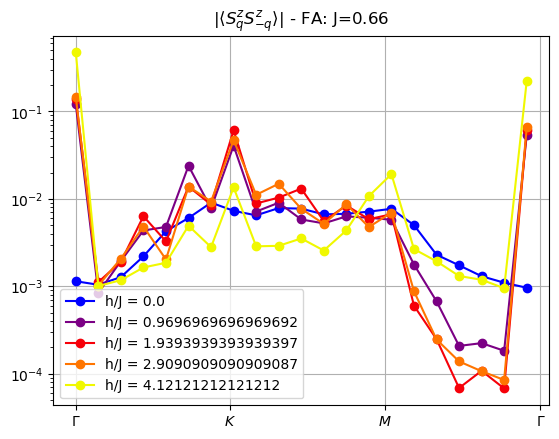

In [87]:
#import Gamma = 0 data
#indices = [1,5,0,4] #jval = 1.4
indices = [0,2,6,5,1] #jval = 0.66

cvals  = [0., 2.0, 4.0, 6.0]
colors = ["blue","red","yellow", "green"]

import matplotlib.colors as mc

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = mc.LinearSegmentedColormap.from_list("", tuples)
step = 6
for index_plot in indices:
    #1, 5, 0, 4
    file_name = where_to_save + "line_FT_"+jval+"_h=" + all_h[index_plot] +".hdf5"
    data = h5py.File(file_name, 'r')
    finalSQ_spin = np.absolute(data['avg_sigmasigma'])
    hoverj = float(all_h[index_plot])/float(jval[2:])
    range_plot = np.arange(0,len(finalSQ_spin), step)
    plt.plot(finalSQ_spin[range_plot], marker = 'o', c = cmap(hoverj/6.0), label = 'h/J = ' + str(hoverj))
numKpoints = len(finalSQ_spin)
xticks = np.array([0, numKpoints, 2*numKpoints + 1, 3*numKpoints + 2])/3 /step
xticks_label = [r"$\Gamma$", r"$K$", r"$M$",r"$\Gamma$"]
#plt.ylim([0,(1/3)**2])
plt.xticks(ticks = xticks, labels = xticks_label);
plt.legend()
plt.yscale('log')
plt.title(r'$|\langle S^z_q S^z_{-q} \rangle |$' + " - FA: " + jval);
plt.grid()

## Quantum, finite $s_p$

In [2]:
# # change the folder!!
# where_to_save = "../../data_prathus_runs/processed_FT/"
# hoverJ_apq = ['0.000', '2.004', '3.908', '5.211', '0.501', '2.505', '1.503', '3.006', '3.507', '1.002']
# slist = ['s=s=0.2', 's=s=0.7']

# change the folder!!
where_to_save = "../../data_prathus_runs/processedFT2/"
hoverJ_apq = ['0', '1', '2', '3', '4']
slist = ['s=0.15', 's=0.65']

An example test.

In [8]:
tag1 = hoverJ_apq[2]
print(tag1)
# tag2 = 's=s=0.2'
tag2 = slist[1]
print(tag2)

# file_name = where_to_save + "3D_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
file_name = where_to_save + "dimer_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
data = h5py.File(file_name, 'r')

# kx_vals = data['kx']
# ky_vals = data['ky']
total_K = data['total_K']
finalSQ_spin = np.absolute(data['avg_sigmasigma'])

# kx_vals_line = data2['kx']
# ky_vals_line = data2['ky']
# total_K = []
# flat_kx = np.array(kx_vals_line).flatten()
# flat_ky = np.array(ky_vals_line).flatten()
# for i in range(len(flat_kx)):
#         total_K.append([flat_kx[i], flat_ky[i]])
# total_K = np.array(total_K)
# total_K = data2['total_K']
# finalSQ_spin_line = np.absolute(data2['avg_sigmasigma'])

2
s=0.65


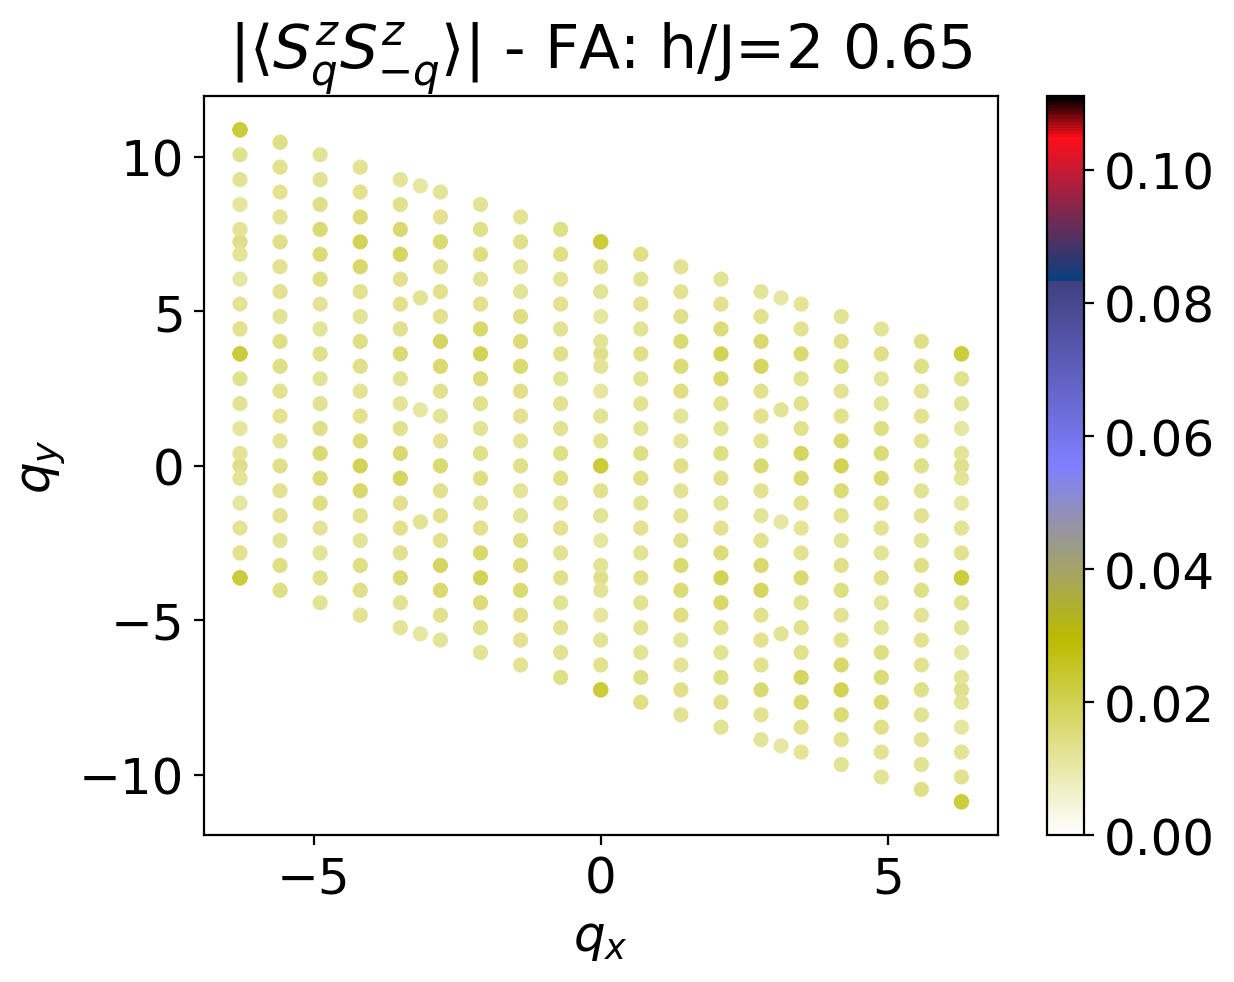

In [11]:
norm = plt.Normalize(0,(1/3)**2)
cmap = mpl.colormaps['gist_stern_r']
#finalSQ_spin = np.absolute(structure_factor)
#finalSQ = final_spin_Q2 - final_spin_Q**2
plt.scatter(total_K[:,0], total_K[:,1], s=20, c=finalSQ_spin, cmap=cmap, norm=norm)
plt.colorbar()
theta_list = [2*np.pi*i/6 for i in range(7)]
lside = 4*np.pi/3
#for j in range(6):
#    plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])],
#     [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)
# total_K_again, kx, ky = path_Kagome(6)
# for i in range(len(total_K_again)):
#     plt.scatter(*total_K_again[i], color = 'black', s = 100, alpha = 0.1)
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
plt.title(r'$S(q)$, with 1st Brillouin Zone')
#plt.title("h/J=" + hoverJ_apq[1] + " s=" + str(0.7))
plt.title(r'$|\langle S^z_q S^z_{-q} \rangle |$' + " - FA: h/J=" + tag1 + " " + tag2[2:]);
plt.show()

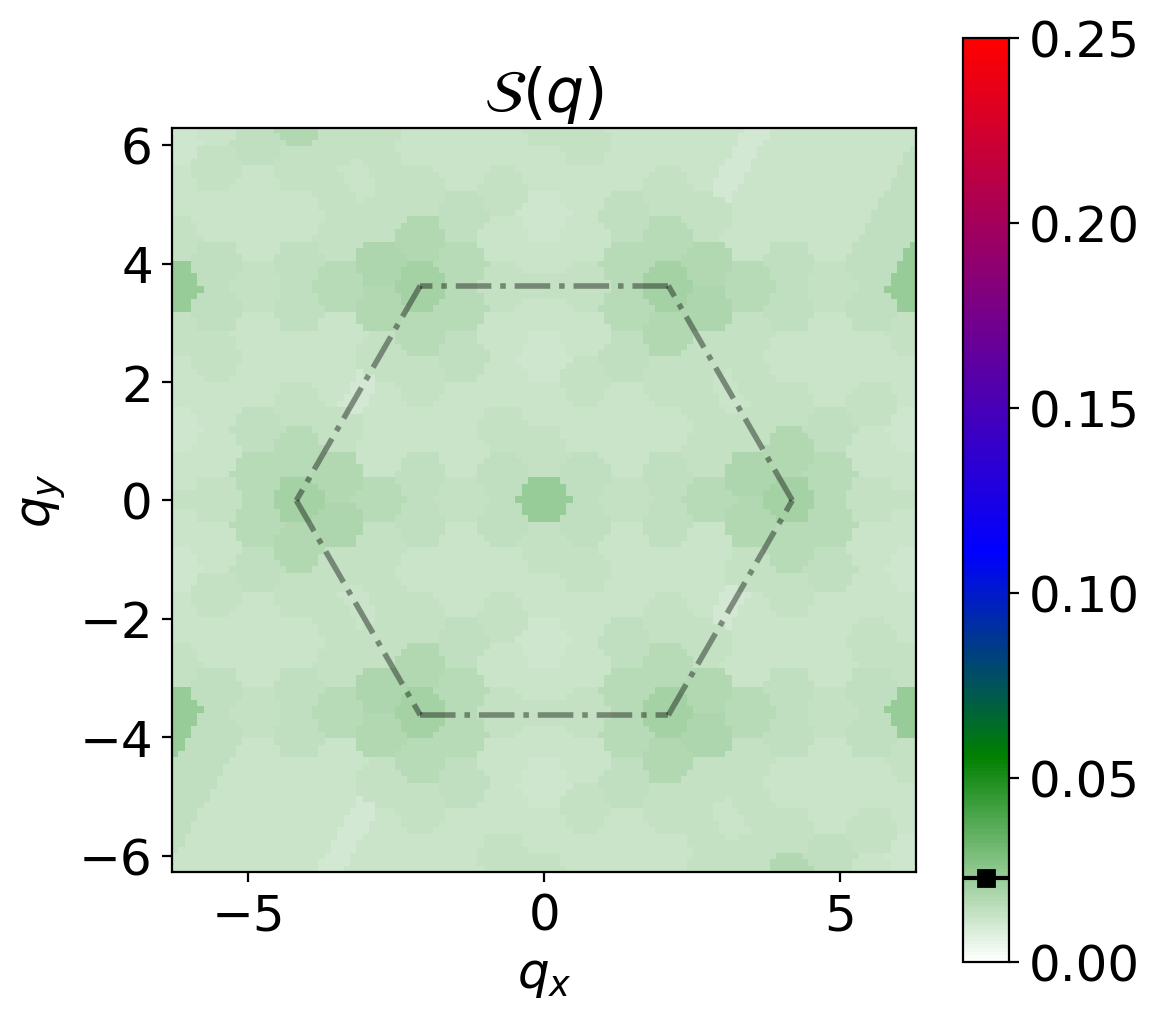

In [13]:
from scipy.interpolate import griddata
nk_init = 30
xlim = np.linspace(-2*np.pi, 2*np.pi, 4*(nk_init - 1) + 1)
ylim = np.linspace(-2*np.pi, 2*np.pi, 4*(nk_init - 1) + 1)
#xlim = np.hstack((np.linspace(-2*np.pi, -0.5, 50), np.linspace(0.5, 2*np.pi, 50)))
#ylim = np.hstack((np.linspace(-2*np.pi, -0.5, 50), np.linspace(0.5, 2*np.pi, 50)))
grid_x, grid_y = np.meshgrid(xlim, ylim, indexing='ij')
points = np.multiply(2,total_K)
values = finalSQ_spin
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
#possible methods: nearest, square, cubic

plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(7,5))


#plt.subplot(221)
#plt.imshow(func(grid_x, grid_y).T, extent=(0, 1, 0, 1), origin='lower')
#plt.plot(points[:, 0], points[:, 1], 'k.', ms=1)   # data
#plt.title('Original')
extent_plot = (-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi)

# cvals  = [0.,(1/3)**2 /3, (1/3)**2 * 2/3, (1/3)**2, (1/2)**2]
# colors = ["white", "yellow","orange","red","green"]
cvals  = [0.,(1/3)**2 /2,  (1/3)**2, (1/2)**2]
colors = ["white", "green","blue","red"]
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = mpl.colors.LinearSegmentedColormap.from_list("", tuples)

# norm = plt.Normalize(0,(1/2)**2)
# cmap = plt.cm.get_cmap('gist_stern_r')

plt.imshow(grid_z0.T, extent=extent_plot, origin='lower', cmap = cmap, norm = norm)
# plt.title('Nearest Interpolation of S(q) for Triangle OP')
plt.title(r'$\mathcal{S}(q)$')
cb = plt.colorbar()
cb.ax.plot(0.5, np.max(grid_z0), 's', color = 'black') # my data is between 0 and 1
cb.ax.plot([0,1], [np.max(grid_z0)]*2, '-', color = 'black') # my data is between 0 and 1

plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
theta_list = [2*np.pi*i/6 for i in range(7)]
lside = 4*np.pi/3
for j in range(6):
    plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])], [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)

#total_K_again, kx, ky = path_Kagome(11)
#for i in range(20):
#    plt.scatter(*total_K_again[i], color = 'black', s = 5)
plt.gcf().set_size_inches(6, 6)
plt.show()

dimer plot

0
s=0.15


/tmp/ipykernel_3681/3234575946.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gist_stern_r')


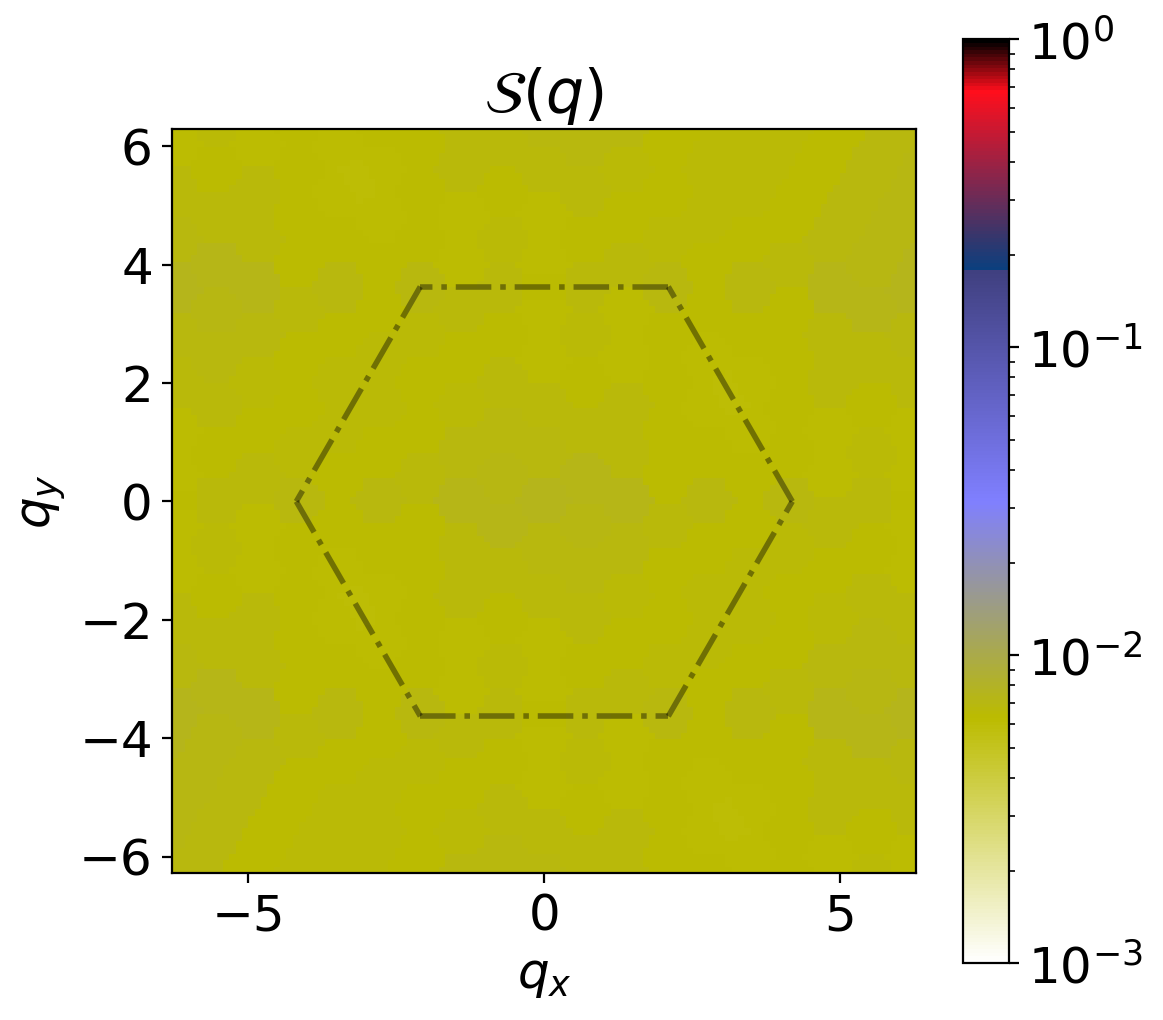

In [54]:
tag1 = hoverJ_apq[0]
print(tag1)
# tag2 = 's=s=0.2'
tag2 = slist[0]
print(tag2)

# file_name = where_to_save + "3D_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
file_name = where_to_save + "dimer_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
data = h5py.File(file_name, 'r')

# kx_vals = data['kx']
# ky_vals = data['ky']
total_K = np.multiply(2, data['total_K'])
finalSQ_spin = np.absolute(data['avg_sigmasigma'])

from scipy.interpolate import griddata
nk_init = 30
xlim = np.linspace(-2*np.pi, 2*np.pi, 4*(nk_init - 1) + 1)
ylim = np.linspace(-2*np.pi, 2*np.pi, 4*(nk_init - 1) + 1)
#xlim = np.hstack((np.linspace(-2*np.pi, -0.5, 50), np.linspace(0.5, 2*np.pi, 50)))
#ylim = np.hstack((np.linspace(-2*np.pi, -0.5, 50), np.linspace(0.5, 2*np.pi, 50)))
grid_x, grid_y = np.meshgrid(xlim, ylim, indexing='ij')
points = total_K
values = finalSQ_spin
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
#possible methods: nearest, square, cubic

plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(7,5))


#plt.subplot(221)
#plt.imshow(func(grid_x, grid_y).T, extent=(0, 1, 0, 1), origin='lower')
#plt.plot(points[:, 0], points[:, 1], 'k.', ms=1)   # data
#plt.title('Original')
extent_plot = (-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi)
cmap = plt.cm.get_cmap('gist_stern_r')
norm = mpl.colors.LogNorm(vmin = 0.001, vmax = 1)

# norm = plt.Normalize(0,(1/2)**2)
# cmap = plt.cm.get_cmap('gist_stern_r')

plt.imshow(grid_z0.T, extent=extent_plot, origin='lower', cmap = cmap, norm = norm)
# plt.title('Nearest Interpolation of S(q) for Triangle OP')
plt.title(r'$\mathcal{S}(q)$')
cb = plt.colorbar()
# cb.ax.plot(0.5, np.max(grid_z0), 's', color = 'black') # my data is between 0 and 1
# cb.ax.plot([0,1], [np.max(grid_z0)]*2, '-', color = 'black') # my data is between 0 and 1

plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
theta_list = [2*np.pi*i/6 for i in range(7)]
lside = 4*np.pi/3
for j in range(6):
    plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])], [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)

#total_K_again, kx, ky = path_Kagome(11)
#for i in range(20):
#    plt.scatter(*total_K_again[i], color = 'black', s = 5)
plt.gcf().set_size_inches(6, 6)
plt.show()

In [51]:
if False:
    plt.scatter(total_K[:,0], total_K[:,1], s=50, c=finalSQ_spin, cmap=cmap, norm=norm)
    theta_list = [2*np.pi*i/6 for i in range(7)]
    lside = 4*np.pi/3
    for j in range(6):
        plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])],
            [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)
    plt.scatter(K[0], K[1], s=20, color = 'black')
    plt.show()

In [55]:
Gamma = np.array([0,0])
K = (4*np.pi/3)*np.array([1, 0])
G = (4*np.pi/3)*(np.array([1, 0]) + np.array([np.cos(2*np.pi/6), np.sin(2*np.pi/6)]))/2
dimer_k_values = []
for i in range(len(total_K)):
    kpt = total_K[i]
    if np.array_equal(kpt, Gamma):
        dimer_k_values.append(['Gamma',kpt, finalSQ_spin[i]])
    if np.allclose(kpt, K, rtol = 5e-3):
        dimer_k_values.append(['K',kpt, finalSQ_spin[i]])
    if np.allclose(kpt, G, rtol = 5e-3):
        dimer_k_values.append(['M', kpt, finalSQ_spin[i]])

print(dimer_k_values)


[['Gamma', array([0., 0.]), 0.007385802469135809], ['M', array([3.14159265, 1.81379936]), 0.006066358024691368], ['Gamma', array([0., 0.]), 0.007385802469135809], ['K', array([4.1887902, 0.       ]), 0.006794945987654314]]


h/J = 2

sp = 0.15

[['Gamma', array([0., 0.]), 0.02153279320987652], ['M', array([3.14159265, 1.81379936]), 0.012523919753086437], ['Gamma', array([0., 0.]), 0.02153279320987652], ['K', array([4.1887902, 0.       ]), 0.01723823302469132]]

sp = 0.65

[['Gamma', array([0., 0.]), 0.022970486111111046], ['M', array([3.14159265, 1.81379936]), 0.012369791666666676], ['Gamma', array([0., 0.]), 0.022970486111111046], ['K', array([4.1887902, 0.       ]), 0.019735243055555532]]

h/J = 0.0

sp = 0.15

[['Gamma', array([0., 0.]), 0.007385802469135809], ['M', array([3.14159265, 1.81379936]), 0.006066358024691368], ['Gamma', array([0., 0.]), 0.007385802469135809], ['K', array([4.1887902, 0.       ]), 0.006794945987654314]]

sp = 0.65 

[['Gamma', array([0., 0.]), 0.007996334876543203], ['M', array([3.14159265, 1.81379936]), 0.006416087962962963], ['Gamma', array([0., 0.]), 0.007996334876543203], ['K', array([4.1887902, 0.       ]), 0.006213059413580249]]



In [23]:
def momentum_grid_kagome_scale(N, ascale):
        # Reciprocal lattice vectors
        b1 = 2*np.pi/ascale * np.array([1, -1/np.sqrt(3)])
        b2 = 2*np.pi/ascale * np.array([0, 2/np.sqrt(3)])

        # Generate a mesh of points in the range -0.5 to 0.5 for each reciprocal lattice vector
        points1 = np.linspace(-1, 1, N)
        points2 = np.linspace(-1, 1, N)
        mesh1, mesh2 = np.meshgrid(points1, points2)

        m1 = mesh1.flatten()
        m2 = mesh2.flatten()
        kx_vals = np.zeros(N**2)
        ky_vals = np.zeros(N**2)
        for i in range(N**2):
                kx_vals[i] = m1[i]*b1[0] + m2[i]*b2[0]
                ky_vals[i] = m1[i]*b1[1] + m2[i]*b2[1]

        total_K = []
        for i in range(N**2):
                total_K.append([kx_vals[i], ky_vals[i]])
        total_K = np.array(total_K)
        kx_vals = kx_vals.reshape(N,N)
        ky_vals = ky_vals.reshape(N,N)



        return total_K, kx_vals, ky_vals

allk, kx, ky = momentum_grid_kagome_scale(19,2)
print(allk)

[[-3.14159265e+00 -1.81379936e+00]
 [-2.79252680e+00 -2.01533263e+00]
 [-2.44346095e+00 -2.21686589e+00]
 [-2.09439510e+00 -2.41839915e+00]
 [-1.74532925e+00 -2.61993242e+00]
 [-1.39626340e+00 -2.82146568e+00]
 [-1.04719755e+00 -3.02299894e+00]
 [-6.98131701e-01 -3.22453220e+00]
 [-3.49065850e-01 -3.42606547e+00]
 [ 0.00000000e+00 -3.62759873e+00]
 [ 3.49065850e-01 -3.82913199e+00]
 [ 6.98131701e-01 -4.03066525e+00]
 [ 1.04719755e+00 -4.23219852e+00]
 [ 1.39626340e+00 -4.43373178e+00]
 [ 1.74532925e+00 -4.63526504e+00]
 [ 2.09439510e+00 -4.83679830e+00]
 [ 2.44346095e+00 -5.03833157e+00]
 [ 2.79252680e+00 -5.23986483e+00]
 [ 3.14159265e+00 -5.44139809e+00]
 [-3.14159265e+00 -1.41073284e+00]
 [-2.79252680e+00 -1.61226610e+00]
 [-2.44346095e+00 -1.81379936e+00]
 [-2.09439510e+00 -2.01533263e+00]
 [-1.74532925e+00 -2.21686589e+00]
 [-1.39626340e+00 -2.41839915e+00]
 [-1.04719755e+00 -2.61993242e+00]
 [-6.98131701e-01 -2.82146568e+00]
 [-3.49065850e-01 -3.02299894e+00]
 [ 0.00000000e+00 -3

Line pot:

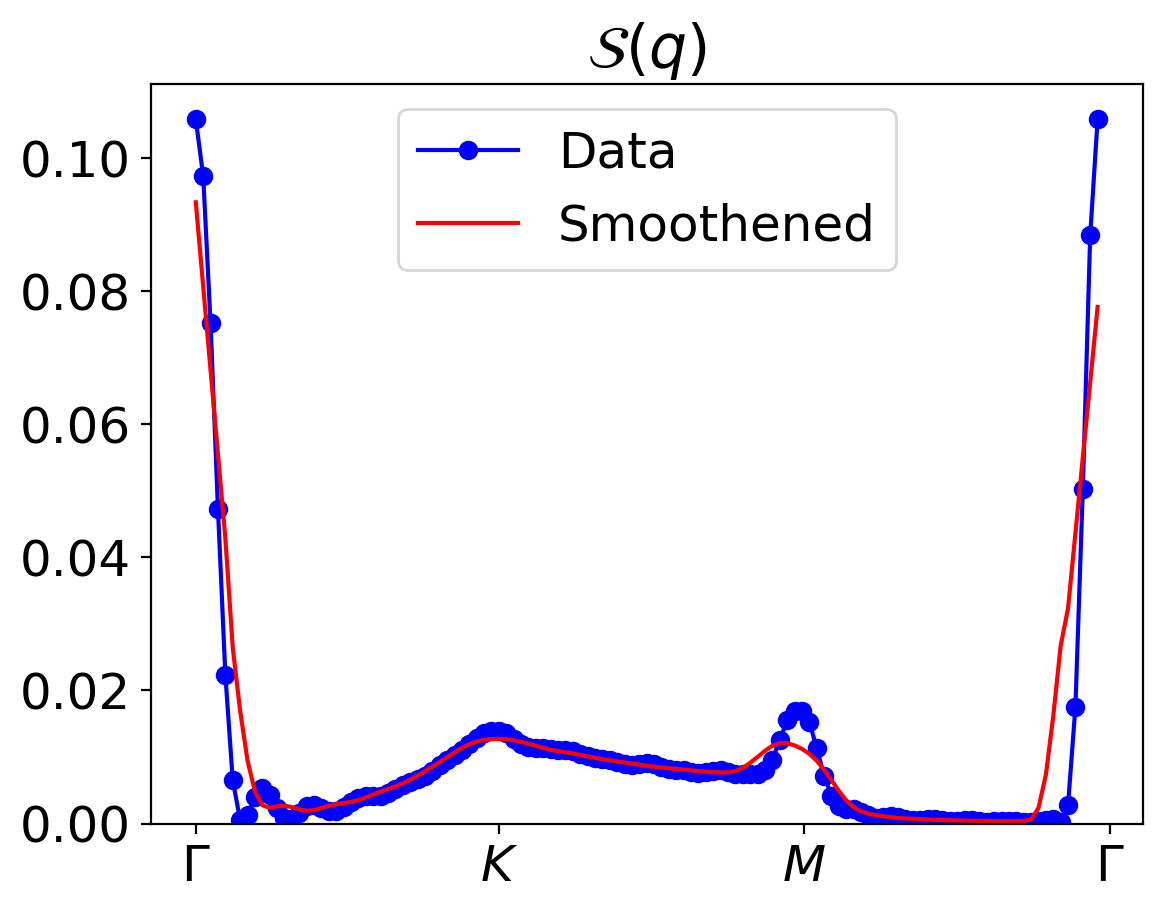

In [26]:
tag1 = hoverJ_apq[2]
tag2 = slist[0]

file_name = where_to_save + "line_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
data2 = h5py.File(file_name, 'r')
finalSQ_spin_line = np.absolute(data2['avg_sigmasigma'])

fig1 = plt.figure()
ax1 = fig1.gca()

# norm = plt.Normalize(0,(1/3)**2)        
# cmap = mpl.colormaps['gist_stern_r']

numKpoints = len(finalSQ_spin_line)
# numKpoints = 40
xticks = np.array([0, numKpoints, 2*numKpoints + 1, 3*numKpoints + 2])/3
xticks_label = [r"$\Gamma$", r"$K$", r"$M$",r"$\Gamma$"]

yhat = savgol_filter(finalSQ_spin_line, 10, 1)

plt.plot(finalSQ_spin_line, marker = 'o', c = 'blue', label = 'Data')
plt.plot(yhat, linestyle = '-', c = 'red', label = 'Smoothened')
plt.ylim([0,(1/3)**2])
plt.xticks(ticks = xticks, labels = xticks_label);
plt.legend()
plt.title(r'$\mathcal{S}(q)$');
plt.show()

In [25]:
tag1

'0'

### Doing all the plots at once.

Careful, this will drop all of the plots into a given folder!!

Firstly, the 3D FT for the spins.

In [11]:
for ind1 in range(10):
# for ind1 in [3]:
    for ind2 in range(2):
        tag1 = hoverJ_apq[ind1]
        print(tag1)
        tag2 = slist[ind2]
        print(tag2)

        file_name = where_to_save + "3D_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
        data = h5py.File(file_name, 'r')

        total_K = data['total_K']
        kx_vals = total_K[:,0]
        ky_vals = total_K[:,1]
        finalSQ_spin = np.absolute(data['avg_sigmasigma'])
        
        fig1 = plt.figure()
        ax1 = fig1.gca()

        norm = plt.Normalize(0,(1/3)**2)        
        if ind1 == 3:
            norm = plt.Normalize(0,(1)**2)
        cmap = mpl.colormaps['gist_stern_r']
        #finalSQ_spin = np.absolute(structure_factor)
        #finalSQ = final_spin_Q2 - final_spin_Q**2
        plt.scatter(kx_vals, ky_vals, s=50, c=finalSQ_spin, cmap=cmap, norm=norm)
        axb = plt.colorbar()
        theta_list = [2*np.pi*i/6 for i in range(7)]
        lside = 4*np.pi/3
        #for j in range(6):
        #    plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])],
        #     [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)
        # total_K_again, kx, ky = path_Kagome(6)
        # for i in range(len(total_K_again)):
        #     plt.scatter(*total_K_again[i], color = 'black', s = 100, alpha = 0.1)
        plt.xlabel(r'$q_x$')
        plt.ylabel(r'$q_y$')
        #plt.title("h/J=" + hoverJ_apq[1] + " s=" + str(0.7))
        plt.title(r'$|\langle S^z_q S^z_{-q} \rangle |$' + " - APQ: h/J=" + tag1 + " " + tag2[2:]);
        plt.savefig(where_to_save + "fig_3DFT_hJ=" + tag1 + "_" + tag2[2:] + ".png")
        plt.close()

        print('done')

0.000
s=s=0.2
done
0.000
s=s=0.7
done
2.004
s=s=0.2
done
2.004
s=s=0.7
done
3.908
s=s=0.2
done
3.908
s=s=0.7
done
5.211
s=s=0.2
done
5.211
s=s=0.7
done
0.501
s=s=0.2
done
0.501
s=s=0.7
done
2.505
s=s=0.2
done
2.505
s=s=0.7
done
1.503
s=s=0.2
done
1.503
s=s=0.7
done
3.006
s=s=0.2
done
3.006
s=s=0.7
done
3.507
s=s=0.2
done
3.507
s=s=0.7
done
1.002
s=s=0.2
done
1.002
s=s=0.7
done


This is for the line FT:

In [12]:
for ind1 in range(10):
# for ind1 in [3]:
    for ind2 in range(2):
        tag1 = hoverJ_apq[ind1]
        print(tag1)
        tag2 = slist[ind2]
        print(tag2)

        file_name = where_to_save + "line_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
        data2 = h5py.File(file_name, 'r')
        finalSQ_spin_line = np.absolute(data2['avg_sigmasigma'])

        fig1 = plt.figure()
        ax1 = fig1.gca()

        norm = plt.Normalize(0,(1/3)**2)        
        if ind1 == 3:
            norm = plt.Normalize(0,(1)**2)
        cmap = mpl.colormaps['gist_stern_r']

        # numKpoints = len(finalSQ_spin)
        numKpoints = 40
        xticks = np.array([0, numKpoints, 2*numKpoints + 1, 3*numKpoints + 2])/3
        xticks_label = [r"$\Gamma$", r"$K$", r"$M$",r"$\Gamma$"]

        yhat = savgol_filter(finalSQ_spin, 10, 1)

        plt.plot(finalSQ_spin, marker = 'o', c = 'blue', label = 'Data')
        plt.plot(yhat, linestyle = '-', c = 'red', label = 'Smoothened')
        plt.ylim([0,(1/3)**2])
        plt.xticks(ticks = xticks, labels = xticks_label);
        plt.legend()
        plt.title(r'$|\langle S^z_q S^z_{-q} \rangle |$' + " - APQ: h/J=" + tag1 + " " + tag2[2:]);
        plt.savefig(where_to_save + "fig_lineFT_hJ=" + tag1 + "_" + tag2[2:] + ".png")
        # plt.grid()
        plt.close()
        print('done')

0.000
s=s=0.2
0.000
s=s=0.7
2.004
s=s=0.2
2.004
s=s=0.7
3.908
s=s=0.2
3.908
s=s=0.7
5.211
s=s=0.2
5.211
s=s=0.7
0.501
s=s=0.2
0.501
s=s=0.7
2.505
s=s=0.2
2.505
s=s=0.7
1.503
s=s=0.2
1.503
s=s=0.7
3.006
s=s=0.2
3.006
s=s=0.7
3.507
s=s=0.2
3.507
s=s=0.7
1.002
s=s=0.2
1.002
s=s=0.7


The dimer FT from the files

In [ ]:
for ind1 in range(10):
# for ind1 in [3]:
    for ind2 in range(2):
        tag1 = hoverJ_apq[ind1]
        print(tag1)
        tag2 = slist[ind2]
        print(tag2)

        file_name = where_to_save + "dimer_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
        data = h5py.File(file_name, 'r')

        total_K = data['total_K']
        kx_vals = total_K[:,0]
        ky_vals = total_K[:,1]
        finalSQ_spin = np.absolute(data['avg_sigmasigma'])

        fig1 = plt.figure()
        ax1 = fig1.gca()

        norm = plt.Normalize(0,(1/3)**2)        
        if ind1 == 3:
            norm = plt.Normalize(0,(1)**2)
        cmap = mpl.colormaps['gist_stern_r']
        #finalSQ_spin = np.absolute(structure_factor)
        #finalSQ = final_spin_Q2 - final_spin_Q**2
        plt.scatter(kx_vals, ky_vals, s=50, c=finalSQ_spin, cmap=cmap, norm=norm)
        axb = plt.colorbar()
        theta_list = [2*np.pi*i/6 for i in range(7)]
        lside = 4*np.pi/3
        #for j in range(6):
        #    plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])],
        #     [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)
        # total_K_again, kx, ky = path_Kagome(6)
        # for i in range(len(total_K_again)):
        #     plt.scatter(*total_K_again[i], color = 'black', s = 100, alpha = 0.1)
        plt.xlabel(r'$q_x$')
        plt.ylabel(r'$q_y$')
        #plt.title("h/J=" + hoverJ_apq[1] + " s=" + str(0.7))
        plt.title(r'$|\langle S^z_q S^z_{-q} \rangle |$' + " - APQ: h/J=" + tag1 + " " + tag2[2:]);
        plt.savefig(where_to_save + "fig_dimerFT_hJ=" + tag1 + "_" + tag2[2:] + ".png")
        plt.close()

        print('done')

# compare line cuts for different h/J and sp

A given $s_p$, for the line FT, and compare some h/J

In [57]:
# # change the folder!!
# where_to_save = "../../data_prathus_runs/processed_FT/"
# hoverJ_apq = ['0.000', '2.004', '3.908', '5.211', '0.501', '2.505', '1.503', '3.006', '3.507', '1.002']
# slist = ['s=s=0.2', 's=s=0.7']

# change the folder!!
where_to_save = "../../data_prathus_runs/processedFT2/"
hoverJ_apq = ['0', '1', '2', '3', '4']
# slist = ['s=0.15', 's=0.65']
slist = ['s=0.15', 's=0.4', 's=0.65']

In [7]:
cvals  = [0.,1.0,2.0,3.0,4.5]
colors = ["red","orange","yellow","green","blue"]
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = mpl.colors.LinearSegmentedColormap.from_list("", tuples)

plot which s_p ? ['s=0.15' 's=0.4' 's=0.65']
plot which s_p ? ['1']


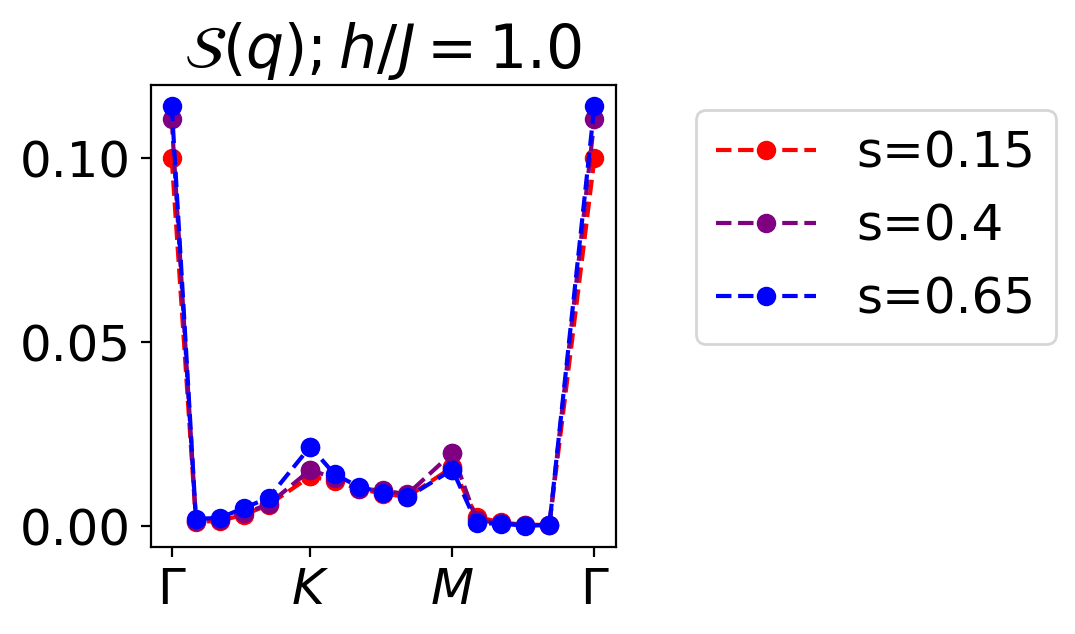

In [136]:
#some h, s=0.7

plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(3,3))

which_s = [0,1,2]
print('plot which s_p ?', np.array(slist)[which_s])
which_hJ = [1]
print('plot which s_p ?', np.array(hoverJ_apq)[which_hJ])

step = 7
numKpoints = 40
# orders = [0, numKpoints, 2*numKpoints + 1, 3*numKpoints + 2]
orders = []
orders.extend([step*i for i in range(numKpoints//step)])
orders.extend([numKpoints])
orders.extend([numKpoints + step*i for i in range(numKpoints//step)])
orders.extend([2*numKpoints + 1])
orders.extend([2*numKpoints + 1 + step*i for i in range(numKpoints//step)])
orders.extend([3*numKpoints + 2])
# orders.extend([numKpoints + 4*i for i in range(10)])
# orders.extend([2*numKpoints + 1 + 4*i for i in range(10)])
# orders.extend([3*numKpoints + 2 + 4*i for i in range(10)])



tuples_s = list(zip([0.,1.0], ["red","blue"]))
cmap_s = mpl.colors.LinearSegmentedColormap.from_list("", tuples_s)


markers = ['o', '+', 's']

for i in which_hJ:
    for j in which_s:
        tag1 = hoverJ_apq[i]
        tag2 = slist[j]
        file_name = where_to_save + "line_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
        data2 = h5py.File(file_name, 'r')
        finalSQ_spin_line = np.real(data2['avg_sigmasigma'])

        yhat = savgol_filter(finalSQ_spin_line, 10, 1)

        # f = interpolate.interp1d(x, y)

        #plt.plot(finalSQ_spin, marker = 'o', c = cmap(), label = 'Data')
        # orders = np.arange(0, len(finalSQ_spin_line), step)
        # plt.plot(yhat[orders], marker = 's', linestyle = '-', label = 'h/J=' + tag1, color = cmap(float(tag1)/4.5))
        # yvals = finalSQ_spin_line[orders]
        yvals = finalSQ_spin_line[orders]

        # plt.plot(orders, yvals, marker = '+', linestyle = '--', color = cmap(float(tag1)/4.5))
        plt.plot(orders, yvals, marker = markers[0], linestyle = '--', color = cmap_s(j/2), label = tag2)

        
#numKpoints = len(finalSQ_spin_line)
xticks = np.array([0, numKpoints, 2*numKpoints + 1, 3*numKpoints + 2])
xticks_label = [r"$\Gamma$", r"$K$", r"$M$",r"$\Gamma$"]
# plt.ylim([0,(1/3)**2])
plt.xticks(ticks = xticks, labels = xticks_label);

# fakexy = (0, 0)
# a = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', color="Black", alpha=1.00)
# b = plt.Line2D(fakexy, fakexy, linestyle='none', marker='+', color="Black", alpha=1.00)
# plt.legend([a, b], [r"$s_p = 0.65$", r"$s_p = 0.15$"], loc='upper center', fontsize='small')

# plt.yscale('log')
plt.title(r'$\mathcal{S}(q); h/J = 1.0$')
# plt.title(r'$s_p = 0.65$')
# plt.title(r'$s_p = 0.15$')
plt.legend(bbox_to_anchor = [2, 1], ncols = 1)


# plt.savefig(where_to_save + "compare_APQ: " + tag2[2:] + ".png")
# plt.grid()
plt.show()

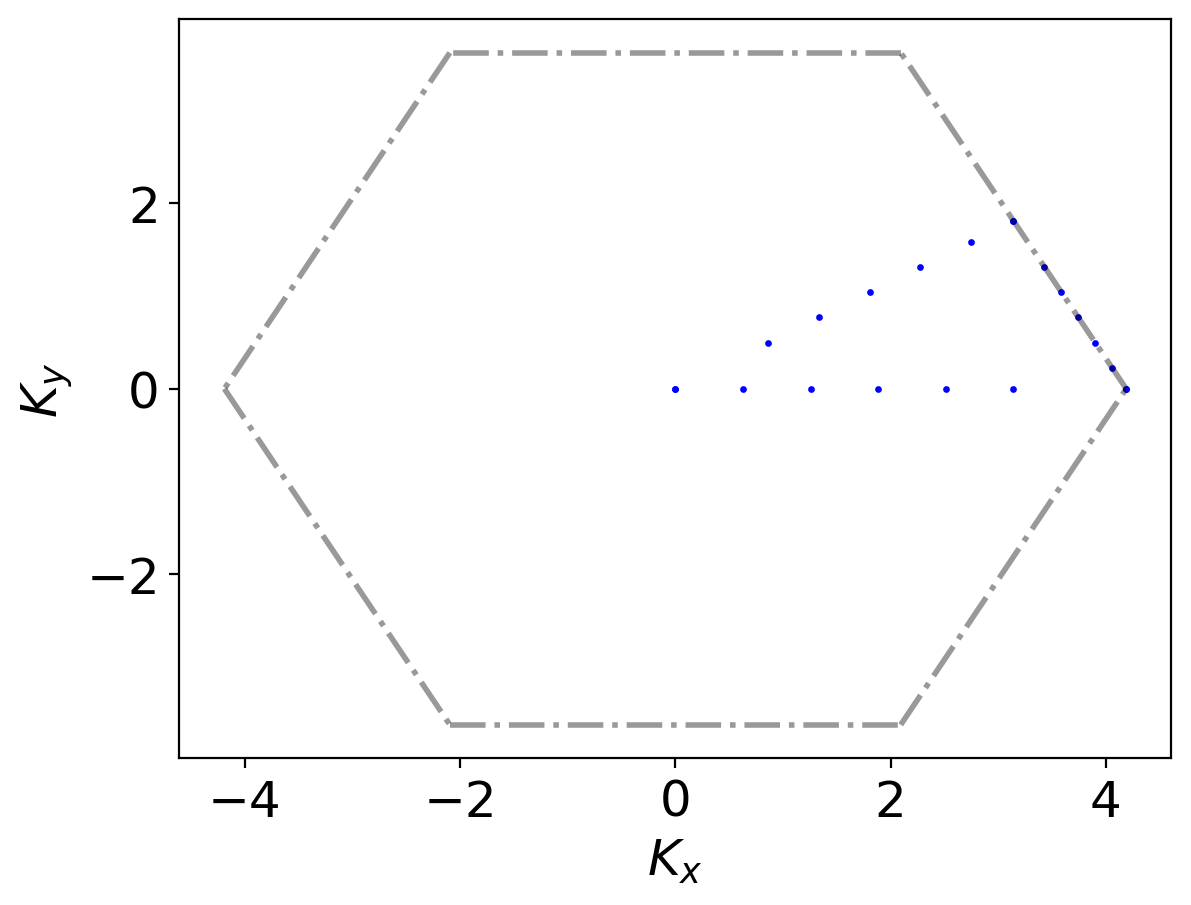

In [73]:
N = numKpoints
Gamma = np.array([0, 0])
#K = (4*np.pi/9)*np.array([1, 1/np.sqrt(3)])
#G = (2*np.pi/3)*np.array([1, 0])
K = (4*np.pi/3)*np.array([1, 0])
G = (4*np.pi/3)*(np.array([1, 0]) + np.array([np.cos(2*np.pi/6), np.sin(2*np.pi/6)]))/2

path = [Gamma]
path += [Gamma + (i/N)*(K-Gamma) for i in range(1, N+1)]
path += [K]
path += [K + (i/N)*(G-K) for i in range(1, N+1)]
path += [G]
path += [G + (i/N)*(Gamma-G) for i in range(1, N+1)]

total_K = np.array(path)
total_K = total_K[orders]
plt.scatter(total_K[:,0], total_K[:,1], label = 'Line', c = 'blue', s = 2)
theta_list = [2*np.pi*i/6 for i in range(7)]
lside = 4*np.pi/3
for j in range(6):
    plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])],
     [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)
plt.xlabel(r'$K_x$')
plt.ylabel(r'$K_y$')
plt.show()

# compare dimer

In [86]:
# change the folder!!
where_to_save = "../../data_prathus_runs/processedFT2/"
hoverJ_apq = ['0', '0.5', '1', '1.25', '2', '2.5', '3', '3.5', '4', '4.5']
# slist = ['s=0.15', 's=0.65']
slist = ['s=0.15', 's=0.4', 's=0.65']

plot which s_p ? ['s=0.15' 's=0.4' 's=0.65']
plot which h/J ? ['0' '0.5' '1' '1.25' '2' '2.5' '3' '3.5' '4' '4.5']


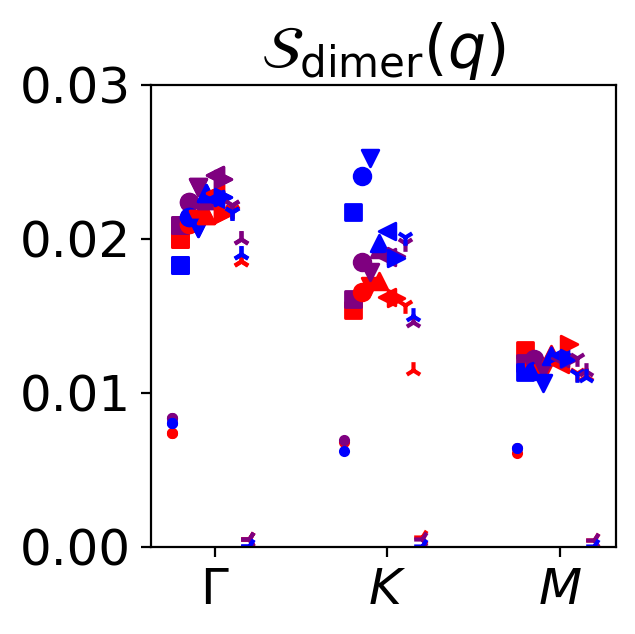

In [92]:
#some h, s=0.7

plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(3,3))

which_s = [0,1,2]
print('plot which s_p ?', np.array(slist)[which_s])
# which_hJ = [0, 1,2, 3]
which_hJ = range(len(hoverJ_apq))
print('plot which h/J ?', np.array(hoverJ_apq)[which_hJ])

step = 7
numKpoints = 40
# orders = [0, numKpoints, 2*numKpoints + 1, 3*numKpoints + 2]
orders = []
orders.extend([step*i for i in range(numKpoints//step)])
orders.extend([numKpoints])
orders.extend([numKpoints + step*i for i in range(numKpoints//step)])
orders.extend([2*numKpoints + 1])
orders.extend([2*numKpoints + 1 + step*i for i in range(numKpoints//step)])
orders.extend([3*numKpoints + 2])
# orders.extend([numKpoints + 4*i for i in range(10)])
# orders.extend([2*numKpoints + 1 + 4*i for i in range(10)])
# orders.extend([3*numKpoints + 2 + 4*i for i in range(10)])



tuples_s = list(zip([0.,1.0], ["red","blue"]))
cmap_s = mpl.colors.LinearSegmentedColormap.from_list("", tuples_s)


markers =  [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"]
for i in which_hJ:
    for j in which_s:
        tag1 = hoverJ_apq[i]
        tag2 = slist[j]
        file_name = where_to_save + "dimer_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
        data2 = h5py.File(file_name, 'r')
        total_K = np.multiply(2, data2['total_K'])
        finalSQ_spin = np.real(data2['avg_sigmasigma'])

        Gamma = np.array([0,0])
        K = (4*np.pi/3)*np.array([1, 0])
        G = (4*np.pi/3)*(np.array([1, 0]) + np.array([np.cos(2*np.pi/6), np.sin(2*np.pi/6)]))/2
        dimer_k_values = []
        shift_i = (i - len(which_hJ)/2)/(2*len(which_hJ))
        for k in range(len(total_K)):
            kpt = total_K[k]
            if np.array_equal(kpt, Gamma):
                # dimer_k_values.append(['Gamma',kpt, finalSQ_spin[i]])
                dimer_k_values.append([0 + shift_i, finalSQ_spin[k]])
            if np.allclose(kpt, K, rtol = 5e-3):
                # dimer_k_values.append(['K',kpt, finalSQ_spin[i]])
                dimer_k_values.append([1 + shift_i, finalSQ_spin[k]])
            if np.allclose(kpt, G, rtol = 5e-3):
                # dimer_k_values.append(['M', kpt, finalSQ_spin[i]])
                dimer_k_values.append([2 + shift_i, finalSQ_spin[k]])

        dimer_k_values = np.array(dimer_k_values)
        # print(dimer_k_values)

        plt.scatter(dimer_k_values[:,0], dimer_k_values[:,1], marker = markers[i], color = cmap_s(j/(len(which_s) - 1)), label = 'h/J = ' + tag1 +' ' + tag2)

        
#numKpoints = len(finalSQ_spin_line)
xticks = np.array([0, 1, 2])
xticks_label = [r"$\Gamma$", r"$K$", r"$M$"]
plt.ylim([0,0.03])
plt.xticks(ticks = xticks, labels = xticks_label);

# fakexy = (0, 0)
# a = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', color="Black", alpha=1.00)
# b = plt.Line2D(fakexy, fakexy, linestyle='none', marker='+', color="Black", alpha=1.00)
# plt.legend([a, b], [r"$s_p = 0.65$", r"$s_p = 0.15$"], loc='upper center', fontsize='small')

# plt.yscale('log')
# plt.title(r'$\mathcal{S}(q); h/J = $' + str(np.array(hoverJ_apq)[which_hJ]))
plt.title(r'$\mathcal{S}_{\rm dimer}(q)$')
# plt.title(r'$s_p = 0.65$')
# plt.title(r'$s_p = 0.15$')
# plt.legend(bbox_to_anchor = [1.5, 1], ncols = 1)
# plt.yscale('log')


# plt.savefig(where_to_save + "compare_APQ: " + tag2[2:] + ".png")
# plt.grid()
plt.show()

plot which s_p ? ['s=0.15' 's=0.4' 's=0.65']
plot which h/J ? ['0' '0.5' '1' '1.25' '2' '2.5' '3' '3.5' '4' '4.5']


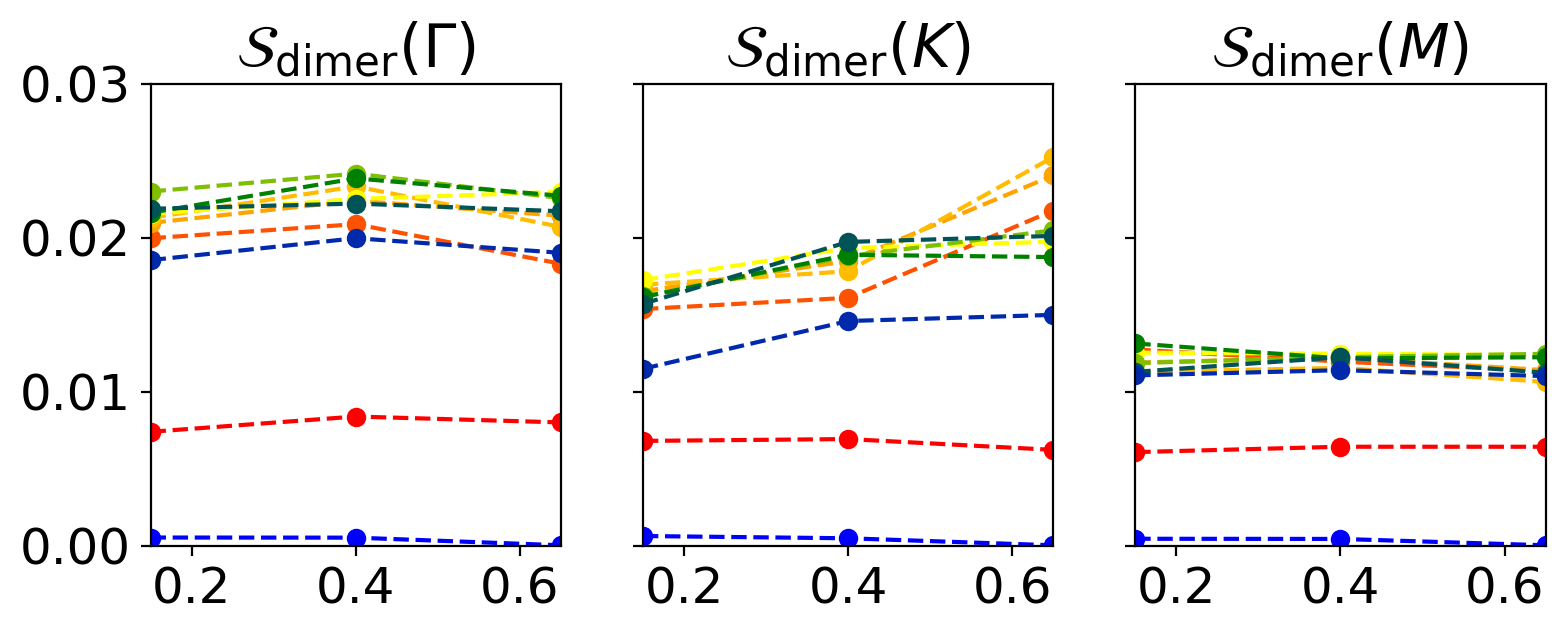

In [120]:
#some h, s=0.7

plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size':18})
# plt.figure(figsize=(3,3))

fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True,
                                    figsize=(9, 3))

which_s = [0,1,2]
print('plot which s_p ?', np.array(slist)[which_s])
# which_hJ = [0, 1,2, 3]
which_hJ = range(len(hoverJ_apq))
print('plot which h/J ?', np.array(hoverJ_apq)[which_hJ])

cvals  = [0.,1.0,2.0,3.0,4.5]
colors = ["red","orange","yellow","green","blue"]
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = mpl.colors.LinearSegmentedColormap.from_list("", tuples)

Gamma = np.array([0,0])
K = (4*np.pi/3)*np.array([1, 0])
G = (4*np.pi/3)*(np.array([1, 0]) + np.array([np.cos(2*np.pi/6), np.sin(2*np.pi/6)]))/2

kvalues = [Gamma, K, G]
titles = [r'$\mathcal{S}_{\rm dimer}(\Gamma)$', r'$\mathcal{S}_{\rm dimer}(K)$', r'$\mathcal{S}_{\rm dimer}(M)$']

markers =  ["o","+",'x']
for lm in range(len(kvalues)):
    kpoint_check = kvalues[lm]
    for i in which_hJ:
        xvals = []
        yvals = []
        for j in which_s:
            tag1 = hoverJ_apq[i]
            tag2 = slist[j]
            sp_val = float(tag2[2:])
            xvals.append(sp_val)
            file_name = where_to_save + "dimer_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
            data2 = h5py.File(file_name, 'r')
            total_K = np.multiply(2, data2['total_K'])
            finalSQ_spin = np.real(data2['avg_sigmasigma'])

            for k in range(len(total_K)):
                kpt = total_K[k]
                if np.allclose(kpt, kpoint_check, rtol = 5e-3):
                    value_here = finalSQ_spin[k]
            yvals.append(value_here)

        ax[lm].plot(xvals, yvals, marker = markers[0], ls = '--', color = cmap(float(tag1)/4.5))
    
    ax[lm].set_ylim([0,0.03])
    ax[lm].set_title(titles[lm])
    ax[lm].set_xlim([0.15, 0.65])
    ax[lm].set_xticks([0.2, 0.4, 0.6])
plt.show()

'0'